In [118]:
import numpy as np
import pandas as pd
import os
import glob
import json


## Data Science Problem
Goodreads is a popular online platform where readers can discover new books, read reviews, and connect with other readers. However, with millions of books available on the platform, it can be overwhelming for users to find books that match their preferences. In this project, we aim to build a recommendation system for Goodreads users that suggests books based on their reading history, preferences, and ratings. Our goal is to provide a personalized and intuitive experience for users, helping them discover new books that they are likely to enjoy. Using supervised learning and NLP techniques, we will build a model that can predict the likelihood of a user liking a book based on features such as book title, author, genre, description, user reviews, and book ratings. The model will be trained on a subset of the Goodreads dataset and evaluated based on accuracy, precision, recall, and F1-score. The final output will be a recommendation engine that suggests books to users based on their input and history on the platform.

Data Extracted from UCSD Goodreads data: https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home


## Objectives

In the preprocessing step, we aim to clean and transform the raw data into a format that is suitable for machine learning models. 
Here are some of the questions we aim to answer during the preprocessing step in this notebook:

Data Cleaning:
Are there any missing values in the dataset?
Are there any duplicate entries in the dataset?
Are there any irrelevant features in the dataset that can be removed?
Are there any inconsistencies in the data that need to be corrected?

Data Transformation:
How can we extract relevant features from the dataset, such as book title, author, genre, description, user reviews, and book ratings?
How can we preprocess the text data to make it suitable for machine learning models, such as tokenization, removing stop words, stemming, and lemmatization?
How can we convert the text data into numerical features that can be used in machine learning models, such as TF-IDF, Bag of Words, or Word2Vec?

Exploratory Data Analysis:
What is the distribution of ratings in the dataset?
What are the most popular genres and authors in the dataset?
Are there any correlations between different features in the dataset?

Data Preparation:
How can we split the dataset into training and testing sets?
How can we balance the dataset to handle class imbalance?
How can we encode categorical variables into numerical variables?

Answering these questions during the preprocessing step is crucial in building an accurate and robust recommendation system that can provide personalized recommendations to Goodreads users.|

In [119]:
# Create dataframe
df = pd.read_csv('df_cleaned_highRatingCount.csv',on_bad_lines = 'skip')


In [120]:
df.head()
df.shape

(20000, 13)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   book_id        20000 non-null  int64  
 1   author_id      20000 non-null  int64  
 2   authors        20000 non-null  object 
 3   title          20000 non-null  object 
 4   description    20000 non-null  object 
 5   publisher      20000 non-null  object 
 6   genres         20000 non-null  object 
 7   avg_rating     20000 non-null  float64
 8   ratings_count  20000 non-null  int64  
 9   num_pages      20000 non-null  int64  
 10  pub_year       20000 non-null  float64
 11  similar_books  20000 non-null  object 
 12  url            20000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.0+ MB


## Number Of Missing Values By Column¶

In [122]:
missing = pd.concat([df.isna().sum(), 100* df.isna().mean()], axis = 1)
missing.columns = ['count','%']
missing.sort_values(by = 'count')

,count,%
book_id,0,0.0
author_id,0,0.0
authors,0,0.0
title,0,0.0
description,0,0.0
publisher,0,0.0
genres,0,0.0
avg_rating,0,0.0
ratings_count,0,0.0
num_pages,0,0.0


In [123]:
df.isnull().sum()

book_id          0
author_id        0
authors          0
title            0
description      0
publisher        0
genres           0
avg_rating       0
ratings_count    0
num_pages        0
pub_year         0
similar_books    0
url              0
dtype: int64

## Categorical Features

In [124]:
df.select_dtypes('object')

,authors,title,description,publisher,genres,similar_books,url
0,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",Winning will make you famous.\nLosing means ce...,Scholastic Press,"['favorites', 'currently-reading', 'to-read', ...","['1902241', '146499', '954674', '9917938', '10...",https://www.goodreads.com/book/show/2767052-th...
1,J.K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,Scholastic Inc,"['to-read', 'favorites', 'fantasy', 'young-adu...","['13830', '127586', '121822', '37586', '616435...",https://www.goodreads.com/book/show/3.Harry_Po...
2,Harper Lee,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,Harper Perennial Modern Classics,"['to-read', 'favorites', 'classics', 'classic'...","['1934', '2156', '15638', '53835', '77142', '5...",https://www.goodreads.com/book/show/2657.To_Ki...
3,F. Scott Fitzgerald,The Great Gatsby,"THE GREAT GATSBY, F. Scott Fitzgerald's third ...",Scribner,"['to-read', 'classics', 'favorites', 'fiction'...","['48203', '337113', '176972', '188087', '10956...",https://www.goodreads.com/book/show/4671.The_G...
4,John Green,The Fault in Our Stars,"There is an alternate cover edition .\n""I fel...",Dutton Books,"['to-read', 'favorites', 'young-adult', 'ficti...","['10051706', '11418182', '10327303', '9627755'...",https://www.goodreads.com/book/show/11870085-t...
...,...,...,...,...,...,...,...
19995,William Anderson,Laura Ingalls Wilder: A Biography,From her pioneer days on the prairie to her go...,HarperCollins,"['to-read', 'biography', 'non-fiction', 'nonfi...","['8221', '1075370', '8220', '8244', '8200', '1...",https://www.goodreads.com/book/show/8202.Laura...
19996,Henry James,The Turn of the Screw and Other Stories,"A young, inexperienced governess is charged wi...",Oxford University Press,"['to-read', 'classics', 'fiction', 'short-stor...","['472', '370160', '933716', '386125', '1612142...",https://www.goodreads.com/book/show/2437237.Th...
19997,Jose Zorrilla,Don Juan Tenorio,"Don Juan Tenorio, el drama romantico por excel...",Catedra,"['classics', 'teatro', 'spanish', 'to-read', '...","['63627', '1639333', '144611', '264384', '2153...",https://www.goodreads.com/book/show/877693.Don...
19998,P.C. Cast,"Elphame's Choice (Partholon, #4)",This follow-up to Goddess by Mistake returns t...,Luna Books,"['to-read', 'fantasy', 'romance', 'owned', 'cu...","['74491', '672827', '710595', '2344218', '3141...",https://www.goodreads.com/book/show/30200.Elph...


In [125]:
df['book_id'].value_counts().sum()

20000

In [126]:
df['authors'].value_counts().head()

James Patterson    110
Nora Roberts        87
Agatha Christie     78
Stephen King        77
Terry Pratchett     62
Name: authors, dtype: int64

In [127]:
df['title'].value_counts().head()

Selected Poems          6
The Complete Poems      5
The Collected Poems     5
Collected Poems         4
Beauty and the Beast    4
Name: title, dtype: int64

In [128]:
df[['title','authors']].nunique()

title      19848
authors     7117
dtype: int64

In [129]:
(df['title'] + ', ' + df['authors']).value_counts().head()

The Hunger Games (The Hunger Games, #1), Suzanne Collins             1
Sharpe's Company (Sharpe, #13), Bernard Cornwell                     1
A Dying Fall (Ruth Galloway, #5), Elly Griffiths                     1
The Swimming-Pool Library, Alan Hollinghurst                         1
One Night with a Prince (Royal Brotherhood, #3), Sabrina Jeffries    1
dtype: int64

In [130]:
df[df[['title', 'authors']].duplicated()]

,book_id,author_id,authors,title,description,publisher,genres,avg_rating,ratings_count,num_pages,pub_year,similar_books,url


In [131]:
df.duplicated(subset=['title','authors']).value_counts()

False    20000
dtype: int64

In [132]:
df[df['title']=='The Known World']

,book_id,author_id,authors,title,description,publisher,genres,avg_rating,ratings_count,num_pages,pub_year,similar_books,url
3066,67,33,Edward P. Jones,The Known World,One of the most acclaimed novels in recent mem...,Amistad,"['to-read', 'currently-reading', 'historical-f...",3.82,26960,432,2006.0,"['274607', '538059', '748029', '1791813', '543...",https://www.goodreads.com/book/show/67.The_Kno...


In [133]:
df[df['title']=='Sputnik Sweetheart']

,book_id,author_id,authors,title,description,publisher,genres,avg_rating,ratings_count,num_pages,pub_year,similar_books,url
1257,9557,3354,Haruki Murakami,Sputnik Sweetheart,Alternate cover edition .\nSumire is in love ...,Vintage,"['to-read', 'favorites', 'fiction', 'japan', '...",3.82,63880,229,2002.0,"['14029', '50159', '62773', '502118', '34462',...",https://www.goodreads.com/book/show/9557.Sputn...


In [134]:

len(df['authors'].unique())

7117

In [135]:
len(df['title'].unique())

19848

The dataset has been cleaned and we removed the duplicates in the previous notebook.

## Cluster the books based on the description.

In [136]:
#importing basic python libraries
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import regex
import nltk

#word embedding
import gensim

#clustering
import sklearn

#connection to data scoursce in Hana cloud
#import hana_ml

In [137]:
import re, string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#import contractions
#from sklearn.feature_extraction.text import TfidVectorizer

## Cleaning Description Column

In [138]:
books_desc = df[['book_id','title','description']]
books_desc.head()

,book_id,title,description
0,2767052,"The Hunger Games (The Hunger Games, #1)",Winning will make you famous.\nLosing means ce...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...
2,2657,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...
3,4671,The Great Gatsby,"THE GREAT GATSBY, F. Scott Fitzgerald's third ..."
4,11870085,The Fault in Our Stars,"There is an alternate cover edition .\n""I fel..."


In [139]:
books_desc.shape

(20000, 3)

## 1.Text Preprocessing

Tokenization: The text in the descriotion column must be parsed and transform into a list of words.

Remove special characters and punctuation

Remove "stop words": Commonly used words without any specific connocation (e.g., "the","a", "an", "in")

Use Natural Language Toolkit (NLTK) and Regular Expressions (RegEx) to clean up and tokenize our text.

In [140]:
# Prepare the book description column 
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=set(stopwords.words("english")) 
import regex as re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maryamnozari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
# Transform to the lowercase
df['tokens'] = df['description'].apply(lambda x: x.lower())

In [142]:
df['tokens']

0        winning will make you famous.\nlosing means ce...
1        harry potter's life is miserable. his parents ...
2        the unforgettable novel of a childhood in a sl...
3        the great gatsby, f. scott fitzgerald's third ...
4        there is an alternate cover edition .\n"i fel...
                               ...                        
19995    from her pioneer days on the prairie to her go...
19996    a young, inexperienced governess is charged wi...
19997    don juan tenorio, el drama romantico por excel...
19998    this follow-up to goddess by mistake returns t...
19999    alternate cover for this asin can be found \n...
Name: tokens, Length: 20000, dtype: object

In [143]:
#Remove punctuations
df['tokens']  = df['tokens'].map(lambda x: re.sub("[-,\.!?;\'\(\)]", ' ',x))

In [144]:
#Remove stopwords
df['tokens']  = df['tokens'].apply(lambda x: ' '.join([t for t in x.split() if not t in stopwords]))

In [145]:
#Remove short tokens
df['tokens'] = df['tokens'].apply(lambda x:' '.join([t for t in x.split()if len(t)>1]))

In [146]:
#Remove extra spaces
df['tokens'] = df['tokens'].map(lambda x: re.sub(' +', ' ', x))

In [147]:
#Remove duplicate tokens
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(list(dict.fromkeys(x.split()))))

In [148]:
df['tokens'].duplicated

<bound method Series.duplicated of 0        winning make famous losing means certain death...
1        harry potter life miserable parents dead stuck...
2        unforgettable novel childhood sleepy southern ...
3        great gatsby scott fitzgerald third book stand...
4        alternate cover edition "i fell love way fall ...
                               ...                        
19995    pioneer days prairie golden years husband alma...
19996    young inexperienced governess charged care mil...
19997    juan tenorio el drama romantico por excelencia...
19998    follow goddess mistake returns ancient greco r...
19999    alternate cover asin found dead women showing ...
Name: tokens, Length: 20000, dtype: object>

In [149]:
df.shape

(20000, 14)

In [150]:
#Drop the duplicates
df = df.drop_duplicates('tokens')

In [151]:
# Remove any non-alphanumeric characters
#books['tokens']=books['tokens'].apply(lambda x: ' '.join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

## Rescources on techniques for pre-processing

https://tutorialspoint.dev/language/python/removing-stop-words-nltk-python

https://en.wikipedia.org/wiki/Regular_expression

## Word Embedding

**Use Global Vectors for Word Representation (GloVe)**: GloVe is a word2vec model that is to say an unsupervised learning algorithm for obtaining vector representations for words.It allows you to take any corpus of text and transform each word into a position in high-dimentional space.

**Download a pretrained model that was trained on a broder corpus**:Wikipidia Each line of text file contains a word follow by N number. The N number describe the vector of the word position. N is varid depending on which model you choose to download.

More Resources:

https://faculty.ai/tech-blog/glove/

https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

In [152]:
import gensim.downloader as gensim_api

In [153]:
model = gensim_api.load("glove-wiki-gigaword-100")

In [154]:

from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [155]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [156]:
import numpy as np
from gensim.models import Word2Vec


# generate embedded features for each book
features = []
for tokens in df['tokens']:
    token_features = []
    for token in tokens:
        try:
            token_features.append(model[token])
        except KeyError:
            continue
    features.append(np.mean(token_features, axis=0))

In [157]:
# add features to DataFrame
for i in range(100):
    feature = 'f_' + str(i)
    df.loc[:,feature] = [f[i] for f in features]

# define embedding column names
embedding = ['f_' + str(i) for i in range(100)]

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_1421/3419084579.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:,feature] = [f[i] for f in features]
/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_1421/3419084579.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:,feature] = [f[i] for f in features]
/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_1421/3419084579.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

In [158]:
#As a resulting of our word embedding technique we associated each book to a 100 -dim numerical vector:
df[['title']+embedding]

,title,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,"The Hunger Games (The Hunger Games, #1)",-0.373169,0.350620,0.119413,-0.133217,-0.325976,0.143434,0.245777,0.178249,-0.411206,...,-0.554344,0.475560,0.332995,0.435598,-0.045632,-0.062133,-0.065313,-0.558776,0.220094,-0.172420
1,Harry Potter and the Sorcerer's Stone (Harry P...,-0.352381,0.401103,0.134197,-0.124104,-0.367576,0.137611,0.240948,0.171266,-0.451973,...,-0.527947,0.445088,0.367797,0.388028,-0.017222,-0.031716,-0.057656,-0.543721,0.230047,-0.169782
2,To Kill a Mockingbird,-0.367063,0.383555,0.116054,-0.122833,-0.318778,0.141613,0.269815,0.193826,-0.425557,...,-0.530788,0.469015,0.312722,0.429721,-0.043864,-0.055515,-0.059491,-0.555098,0.231740,-0.165736
3,The Great Gatsby,-0.332005,0.360995,0.115008,-0.110071,-0.293177,0.159606,0.274343,0.187480,-0.388977,...,-0.509817,0.460756,0.314595,0.368781,-0.034070,-0.052203,-0.079225,-0.560967,0.220970,-0.167123
4,The Fault in Our Stars,-0.388036,0.371054,0.145875,-0.119477,-0.337119,0.135948,0.247158,0.186465,-0.429449,...,-0.546614,0.416026,0.308117,0.417974,-0.024424,-0.081384,-0.054108,-0.565471,0.238397,-0.151503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Laura Ingalls Wilder: A Biography,-0.403143,0.363144,0.155645,-0.172864,-0.286736,0.149748,0.219769,0.153758,-0.391053,...,-0.580549,0.488930,0.374508,0.475096,-0.006809,-0.014865,-0.026088,-0.559379,0.238179,-0.168233
19996,The Turn of the Screw and Other Stories,-0.388522,0.361636,0.125020,-0.133809,-0.314835,0.145734,0.251890,0.180652,-0.389939,...,-0.553560,0.492386,0.355061,0.442034,-0.003934,-0.059204,-0.064713,-0.577788,0.233060,-0.179872
19997,Don Juan Tenorio,-0.361378,0.340595,0.132025,-0.166883,-0.286280,0.186917,0.241576,0.215877,-0.377350,...,-0.443439,0.452658,0.267660,0.428232,-0.051930,-0.085906,-0.067523,-0.559536,0.238448,-0.116780
19998,"Elphame's Choice (Partholon, #4)",-0.388571,0.352787,0.113793,-0.150072,-0.388165,0.126084,0.256321,0.195664,-0.392025,...,-0.581985,0.488232,0.336257,0.462039,-0.016271,-0.091678,-0.091495,-0.591330,0.187014,-0.151512


## KMeans Clustering

Now that we have represented each book by a point in a multidimentional space, we can use the distance between each books to find out which books are similar to each other.

In [161]:
from sklearn.cluster import KMeans

In [163]:
df[embedding]

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,-0.373169,0.350620,0.119413,-0.133217,-0.325976,0.143434,0.245777,0.178249,-0.411206,0.174251,...,-0.554344,0.475560,0.332995,0.435598,-0.045632,-0.062133,-0.065313,-0.558776,0.220094,-0.172420
1,-0.352381,0.401103,0.134197,-0.124104,-0.367576,0.137611,0.240948,0.171266,-0.451973,0.159818,...,-0.527947,0.445088,0.367797,0.388028,-0.017222,-0.031716,-0.057656,-0.543721,0.230047,-0.169782
2,-0.367063,0.383555,0.116054,-0.122833,-0.318778,0.141613,0.269815,0.193826,-0.425557,0.191153,...,-0.530788,0.469015,0.312722,0.429721,-0.043864,-0.055515,-0.059491,-0.555098,0.231740,-0.165736
3,-0.332005,0.360995,0.115008,-0.110071,-0.293177,0.159606,0.274343,0.187480,-0.388977,0.184570,...,-0.509817,0.460756,0.314595,0.368781,-0.034070,-0.052203,-0.079225,-0.560967,0.220970,-0.167123
4,-0.388036,0.371054,0.145875,-0.119477,-0.337119,0.135948,0.247158,0.186465,-0.429449,0.182293,...,-0.546614,0.416026,0.308117,0.417974,-0.024424,-0.081384,-0.054108,-0.565471,0.238397,-0.151503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.403143,0.363144,0.155645,-0.172864,-0.286736,0.149748,0.219769,0.153758,-0.391053,0.195766,...,-0.580549,0.488930,0.374508,0.475096,-0.006809,-0.014865,-0.026088,-0.559379,0.238179,-0.168233
19996,-0.388522,0.361636,0.125020,-0.133809,-0.314835,0.145734,0.251890,0.180652,-0.389939,0.188545,...,-0.553560,0.492386,0.355061,0.442034,-0.003934,-0.059204,-0.064713,-0.577788,0.233060,-0.179872
19997,-0.361378,0.340595,0.132025,-0.166883,-0.286280,0.186917,0.241576,0.215877,-0.377350,0.227933,...,-0.443439,0.452658,0.267660,0.428232,-0.051930,-0.085906,-0.067523,-0.559536,0.238448,-0.116780
19998,-0.388571,0.352787,0.113793,-0.150072,-0.388165,0.126084,0.256321,0.195664,-0.392025,0.194688,...,-0.581985,0.488232,0.336257,0.462039,-0.016271,-0.091678,-0.091495,-0.591330,0.187014,-0.151512


Text(0.5, 1.0, 'Elbow Curve')

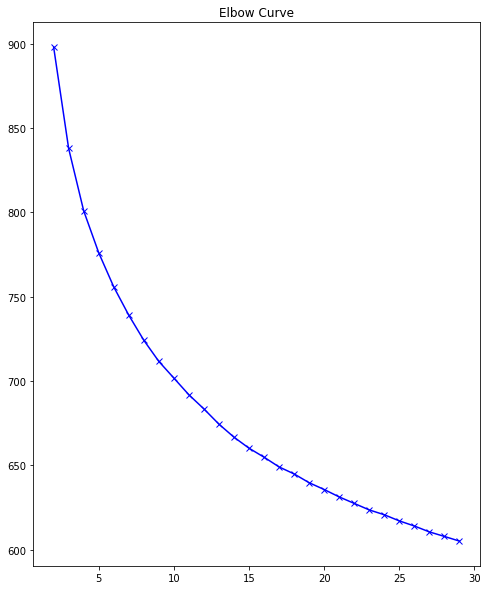

In [172]:


X = df[embedding]

distortions =[]
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(8,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

**Using Cluster Analysis**: The similar books will be grouped togther.

**Setting the number of group to 10**: We use KMeans clustering algorithm in the form og MiniBatchKmeans

In [93]:
from sklearn.cluster import MiniBatchKMeans

In [187]:
n_clus = 8
km = MiniBatchKMeans(n_clusters = n_clus, random_state = 42, max_iter = 1000)
y_kmeans = km.fit_predict(df[embedding])
df['kmeans_cluster']= y_kmeans

## Cluster Profiling

Examine the most representative book from each cluster to see if the clustering work effectively.





In [188]:
for cluster in range(n_clus):
    print('************* ')
    print('- CLUSTER ',str(cluster))
    print('*************')
    bks=df[df['kmeans_cluster']==cluster]
    most_representative_docs = np.argsort(
    np.linalg.norm(bks[embedding] - km.cluster_centers_[cluster], axis=1)
)
    del bks
    centroid_index= most_representative_docs[0]
    centroid=[]
    for i in range(100):
        feature='f_'+str(i)
    for d in most_representative_docs[:10]:
        print(df.reset_index().description[d])
        print("--")

************* 
- CLUSTER  0
*************
Professor Gabriel Emerson has left his position at the University of Toronto to embark on a new life with his beloved Julianne. Together, he's confident that they can face any challenge. And he's eager to become a father.
But Julianne's graduate program threatens Gabriel's plans, as the pressures of being a student become all consuming. When she is given the honor of presenting an academic lecture at Oxford, Gabriel is forced to confront her about the subject of her presentation - research that conflicts with his own. And in Oxford, several individuals from their past appear, including an old nemesis intent on humiliating Julia and exposing one of Gabriel's darkest secrets.
In an effort to confront his remaining demons, Gabriel begins a quest to discover more about his biological parents, beginning a chain of events that has startling repercussions for himself, Julianne, and his hope of having a family.
--
It was Sloane who yanked Emily out of 

Jeannette Walls's memoir The Glass Castle was "nothing short of spectacular" (Entertainment Weekly). Now, in Half Broke Horses, she brings us the story of her grandmother, told in a first-person voice that is authentic, irresistible, and triumphant.
"Those old cows knew trouble was coming before we did." So begins the story of Lily Casey Smith, Jeannette Walls's no nonsense, resourceful, and spectacularly compelling grandmother. By age six, Lily was helping her father break horses. At fifteen, she left home to teach in a frontier town -- riding five hundred miles on her pony, alone, to get to her job. She learned to drive a car ("I loved cars even more than I loved horses. They didn't need to be fed if they weren't working, and they didn't leave big piles of manure all over the place") and fly a plane. And, with her husband Jim, she ran a vast ranch in Arizona. She raised two children, one of whom is Jeannette's memorable mother, Rosemary Smith Walls, unforgettably portrayed in The Gla

In [189]:
#Saving the new df
df.to_csv(r'/Users/maryamnozari/Desktop/Springboard/BookRecommendationSystems/BookRecommendationSystems.csv')


**The rest of this notebook is run on a different notebook due to the size of the visualization**

## Cluster Visualization

To visualize high-dimensional datasets we can use techniques known as **dimensionality reduction**. 

**t-Distributed Stochastic Neighbor Embedding (t-SNE)*** is a technique for dimensionality reduction that allows to map an high-dimensional distribution to a 2-dim plane. Since this is computationally quite heavy, another dimensionality reduction technique is used in conjunction with it, e.g. **Principal Component Analysis** or **PCA**. 


PCA is a technique for reducing the number of dimensions in a dataset while retaining most information. It analyzes the correlation between dimensions and attempts to provide a minimum number of variables that keeps the maximum amount of variation or information about the original data distribution. 

we will first reduce our dimensions from 100 to 50 using PCA, and eventually using t-sne to visualize our clusters in 2 dimensions. 

## Reducing Variables with PCA

In [185]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE

In [186]:
#pca_50 = PCA(n_components = 50)


In [102]:
#pca_50_result = pca_50.fit_transform(df[embedding])

In [103]:
#pca_50_result 

In [104]:
#Cumulative variation for 50 principal components
#np.sum(pca_50.explained_variance_ratio_)

## Execute TSNE Model

In [105]:
#tsne = TSNE(n_components= 2, verbose= 0, perplexity= 30, n_iter = 2000)
#tsne_pca_result = tsne.fit_transform(pca_50_result)

In [106]:
#df['tsne_1'] = tsne_pca_result[:,0]
#df['tsne_2']= tsne_pca_result[:,1]

## Plot clusters in a 2-dimentional plane

In [107]:
#plt.figure(figsize=(10,8))
#sns.scatterplot(x= 'tsne_1', y = 'tsne_2', hue = 'kmeans_cluster', s= 30, palette = 'Paired', data = df)

In [110]:
#sample_titles = ['To Kill a Mockingbird','The Great Gatsby', 'Dear and Glorious Physician']


#for t in sample_titles:
    #x=df.loc[df['title']==t,'tsne_1'].tolist()[0]
    #y=df.loc[df['title']==t,'tsne_2'].tolist()[0]
    
    #plt.scatter(x,y)
    #plt.annotate(t,(x,y),xytext=(x-70,y),arrowprops={'arrowstyle':'fancy'})
#plt.xlabel('tsne_1')
#plt.ylabel('tsne_2')
#plt.xlim([-100,100])
#plt.ylim([-100,100])
#plt.show()








In [111]:
#print(df[:20])

In [112]:
# Let's find two similar books based on similar book column to test the model with similar genres. 

In [113]:
#df.loc[df.book_id==10051706, 'title'].values[0]

In [114]:
#df.loc[df.book_id==10327303, 'title'].values[0]

Samples of books dealing with different themes were assigned to different clusters and lay far from each other in the plot and sample of similar books are in similar clusters.








In [115]:
#sample_titles = ['Au Revoir, Crazy European Chick (Perry & Gobi, #1)','Uncommon Criminals (Heist Society, #2)']


#for t in sample_titles:
    #x=df.loc[df['title']==t,'tsne_1'].tolist()[0]
    #y=df.loc[df['title']==t,'tsne_2'].tolist()[0]
    
    #plt.scatter(x,y)
    #plt.annotate(t,(x,y),xytext=(x-70,y),arrowprops={'arrowstyle':'fancy'})
#plt.xlabel('tsne_1')
#plt.ylabel('tsne_2')
#plt.xlim([-100,100])
#plt.ylim([-100,100])
#plt.show()


It seemes that that cluster 7 and 1 are very close to eachother and therefore our model is performing well.

In [116]:
#!pwd

In [117]:
# save the data to a new csv file
#df.to_csv(index=False)